# Lesson 01


REVISIONS|
---------|-------------------------------
2018-1218|CEF, initial.                  
2019-0124|CEF, spell checked and update. 


### ITMAL

We startup by reusing parts of 01_the_machine_learning_landscape.ipynb from Géron. So we begin with what Géron says about life satisfactions vs GDP per capita.

Halfway down this notebook, a list of questions for ITMAL is presented.

## Chapter 1 – The Machine Learning landscape

_This is the code used to generate some of the figures in chapter 1._

### Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# % reset -f

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # ITMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

OK


### Code example 1-1

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

OK


The code in the book expects the data files to be located in the current directory. I just tweaked it here to fetch the files in datasets/lifesat.

In [3]:
import os
datapath = os.path.join("../datasets", "lifesat", "")

print("OK")

OK


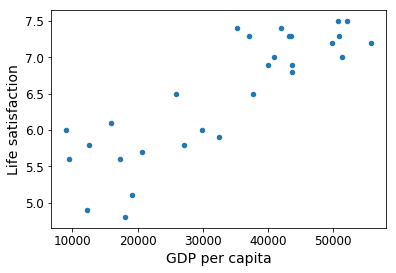

[[5.96242338]]
OK


In [14]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

print("OK")

## ITMAL

Now we plot the linear regression result.

Just ignore all the data mumbo-jumbo here (from the notebook, [GITHOML])...and see the final plot.

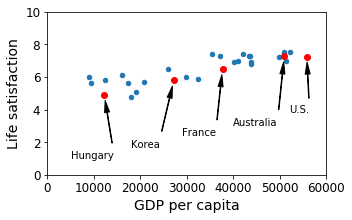

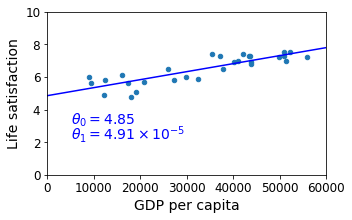

OK


In [5]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()


print("OK")

## Ultra-brief Intro to the Fit-Predict Interface in Scikit-learn

OK, the important lines in the cells above are really just
```python
#Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

```

What happens here is that we create  model, called LinearRegression (for now just a 100% black-box method), put in our data training $\mathbf{X}$ matrix and corresponding desired training ground thruth vector $\mathbf{y}$ (aka $\mathbf{y}_{true})$, and then train the model. 

After training we extract a _predicted_ $\mathbf{y}_{pred}$ vector from the model, for some input scalar $x$=22587. 


### Supervised Training via Fit-predict

The train-predict (or train-fit) process on some data can be visualized as

<img src="Figs/supervised_learning.png" style="height:250px">

In this figure the untrained model is a `sklearn.linear_model.LinearRegression` python object. When trained via  `model.fit()`, using some know answers for the data, $\mathbf{y}_{true}$, it becomes a blue-boxed trained model.

The trained model can be used to _predict_ values from new, yet-unseen, data, via the `model.predict()` function. 

In other words, how high is life-satisfaction for Cyprus' GDP=22587 USD?

Just call `model.predict()` on a matrix with one single numerical element, 22587, well, not a matrix really, but a python list-of-lists, `[[22587]]`  

```y_pred = model.predict([[22587]])```

Apparently 5.96 the models answers!

(you get used to the python built-in containers and numpy on the way..)

### Qa) The $\theta$ parameters and the $R^2$ Score

Géron uses some $\theta$ parameter from this linear regression model, in his examples and plots above.

How do you extract the $\theta_0$ and $\theta_1$ coefficients in his life-satisfaction figure form the linear regression model?

Read the documentation for the linear regressor at

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Extract the score=0.734 for the model using data (X,y) and explain what $R^2$ score measures in broad terms

$$
\begin{array}{rcll}
    R^2 &=& 1 - u/v\\
    u   &=& \sum (y_{true} - y_{pred})^2   ~~~&\small \mbox{residual sum of squares}\\
    v   &=& \sum (y_{true} - \mu_{true})^2 ~~~&\small \mbox{total sum of squares}
\end{array}
$$

with $y_{true}$ being the true data, $y_{pred}$ being the predicted data from the model and $\mu_{true}$ being the true mean of the data.

What are the minimum and maximum values for $R^2$?

Is it best to have a low $R^2$ score (a measure of error/loss via a cost-function) or a high  $R^2$ score (a measure of fitness/goodness)? 

NOTE: the $R^2$ is just one of many scoring functions used in ML, we will see plenty more other methods later.

OPTIONAL: Read the additional in-depth literature on $R^2$ https://en.wikipedia.org/wiki/Coefficient_of_determination

In [6]:
# https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative

# Extraciton of Theta0 and Theta1. These show the cutting with the y-axis and the slope:
interceptTheta0 = lin1.intercept_
coefficientTheta1 = lin1.coef_
print(f'Y-line intercept: {interceptTheta0}')
print(f'Slope coefficient: {coefficientTheta1}')

# The score is extracted (R^2) by using the 'score' function
score = model.score(X, y)
print(f'score: {score}' )

# R^2 score defines how closely the dataset follow the regressionline. The value goes towards 1, and can be 0 or even negative.
# 1 is the maximum value of R^2 which means the dataset follow the regression line perfectly
# If the value is 0, it means the dataset follow the regression line very poorly. If it fits worse than a horizontal line,
# negative values indicate the dataset has no correlation with the regression line

# R^2 is defined by 1 - u/v, where u is the residual sum of squares and v is total sum of squares. If the residiual sum
# of squares is very high the R^2 will become low. If the residiual sum of squares is low, it will indicate that it closely
# follows the regression line, and the R^2 value will become higher.

# The value of R^2 should preferably be high, because it shows the precision of the chosen data set,
# but a high R^2 value does not mean that we have a 'correct' line, only in correlation to the selected data set. If the data
# set changes, then the R^2 may change, and the linear regression model should be reevaluated.

Y-line intercept: [4.8530528]
Slope coefficient: [[4.91154459e-05]]
score: 0.7344414355437029


## The Merits of the Fit-Predict Interface

Now comes the really fun part: all methods in Scikit-learn have this fit-predict interface, and you can easily interchange models in your code just by instantiating a new and perhaps better ML model.

There are still a lot of per-model parameters to tune, but fortunately, the built-in default values provide you with a good initial guess for good model setup.

Later on, you might want to go into the parameter detail trying to optimize some params (opening the lid of the black-box ML algo), but for now, we pretty much stick to the default values.

Let's try to replace the linear regression now, let's test a _k-nearest neighbour algorithm_ instead (still black boxed algorithm-wise)...


### Qb) Using k-Nearest Neighbors

Change the linear regression model to a ```sklearn.neighbors.KNeighborsRegressor``` with k=3 (as in [HOML:p21,bottom])...

What do the k-nearest neighbours estimate for Cyprus, compared to the linear regression (it should yield=5.77)?

What _score-method_ does the k-nearest model use, and is it comparable to the linear regression model?

Seek out the documentation in Scikit-learn, if the scoring methods are not equal, can they be compared to each other at all then?

In [7]:
# this is our raw data set:
sample_data

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [8]:
# and this is our preprocessed data
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


X.shape= (29, 1)
y.shape= (29, 1)


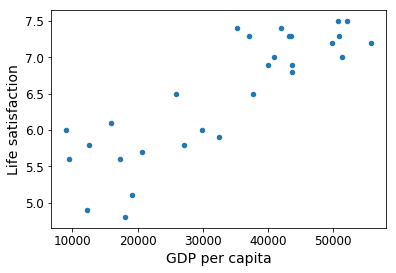

Life satisfaction of Cyprus: [[5.76666667]]
Score: 0.8525732853499179


In [9]:
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select and train a model (linear regression or k-nearest neighbours)

# In the code below, kNeighborsRegressor is chosen with a k value of 3.
kNeighbors_reg_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
kNeighbors_reg_model.fit(X,y)
X_new = [[22587]]

# k-nearest for Cyprus with a k value of 3 is calculated as 5,7, as shown in the print below.
print(f'Life satisfaction of Cyprus: {kNeighbors_reg_model.predict(X_new)}')

# The score is found in the same way as LinearRegression, by using the 'score' function
score = kNeighbors_reg_model.score(X, y)
print(f'Score: {score}')

# The score is computed by using the 3 closest neighbors. The one used in the LinearRegression calculates for the whole
# data set, while the k-nearest uses the k closest points to the specified X-value. 


### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check

But thats not the full story. Try plotting the prediction for both models in the same graph and tune the ```k_neighbor``` parameter when instantiating the model.  

Does ```k_neighbor=1``` not look beautiful regarding the score (should yield score=1)? ...or does it?

Plot the two models in a 'Life Satisfaction-vs-GDP capita' 2D plot by creating an array in the range 0 to 60000 (USD) and then predict the corresponding y value. Reuse the plots stubs below, and explain why the k-nearest neighbour with ```k_neighbor=1``` has such a good score.

Does a score=1 with ```k_neighbor=1```also mean that this would be the prefered estimator for the job?

Hint here is a similar plot of a KNN for a small set of different k's:

<img src="Figs/regression_with_knn.png" style="height:150px">

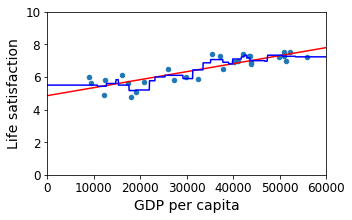

In [17]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

# create a test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)

M=np.empty([m.shape[0],1])

M[:,0]=m

# TODO from this test M data, predict the y values via the lin.reg. and k-nearest models
# lin_reg_model = sklearn.linear_model.LinearRegression()

linearReg_reg_model = sklearn.linear_model.LinearRegression()
linearReg_reg_model.fit(X,y)
y_pred_lin  = linearReg_reg_model.predict(M)

kNeighbors_reg_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
kNeighbors_reg_model.fit(X,y)
y_pred_kn  = kNeighbors_reg_model.predict(M)

# TODO use plt.plot to plot x-y into the sample_data plot...
plt.plot(M, y_pred_lin, "r")
plt.plot(M, y_pred_kn, "b")